In [ ]:
pip install scikit-learn

In [ ]:
pip install yellowbrick

In [ ]:
pip install scipy

In [ ]:
pip install yellowbrick

In [ ]:
pip install sklearn

In [ ]:
pip install hazm

In [ ]:
pip install gensim

In [ ]:
pip install tqdm

In [ ]:
pip install bs4

In [ ]:
pip install selenium

In [14]:
import seaborn as sns

from yellowbrick.cluster import kelbow_visualizer, intercluster_distance
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# from .preprocess import *
from phase3.clustering import return_clustered_csv, kmeans, load_data, vectorize, get_res, grid_search, GMM, hierarchical, return_clustered_csv_gmm

sns.set_theme()
sns.set_style("dark")

In [8]:
# loading data
data, major_labels, minor_labels = load_data(stem=False, lemmatize=True, remove_conjunctions=True)
tfidf, w2v = vectorize(data, w2v_options=dict(size=64, iter=128, min_count=2))
pca_tfidf = PCA(64, random_state=666).fit_transform(tfidf.toarray())

In [ ]:
get_res(return_clustered_csv(data, kmeans, pca_tfidf, w2v, options=dict(random_state=666), save=True), data=data)

In [ ]:
get_res(hier_res=return_clustered_csv(
    data,
    hierarchical,
    tfidf=pca_tfidf, w2v=w2v,
    options=dict(n_components=len(major_labels)),
    save=True), data=data)

In [3]:
variables = dict(n_components=list(range(4,16)), max_iter=[100, 250, 500], covariance_type=['spherical', 'tied', 'diag', 'full'])
fixed_vars = dict(random_state=666)
res = grid_search(GMM, data=data, tfidf=pca_tfidf, w2v=w2v, variables=variables, fixed_params=fixed_vars)

100%|██████████| 144/144 [02:01<00:00,  1.18it/s]


In [9]:
ftfidf = res[(res['metric'] == 'adjusted_mutual_info') & (res['n_components'] == len(major_labels)) &
             (res['vectorization'] == 'tf-idf')]
_ = ftfidf[ftfidf['score'] == ftfidf['score'].max()]

In [10]:
fw2v = res[(res['metric'] == 'adjusted_mutual_info') & (res['n_components'] == len(major_labels)) & 
           (res['vectorization'] == 'w2v')]
_ = fw2v[fw2v['score'] == fw2v['score'].max()]

TypeError: 'AxesSubplot' object is not subscriptable

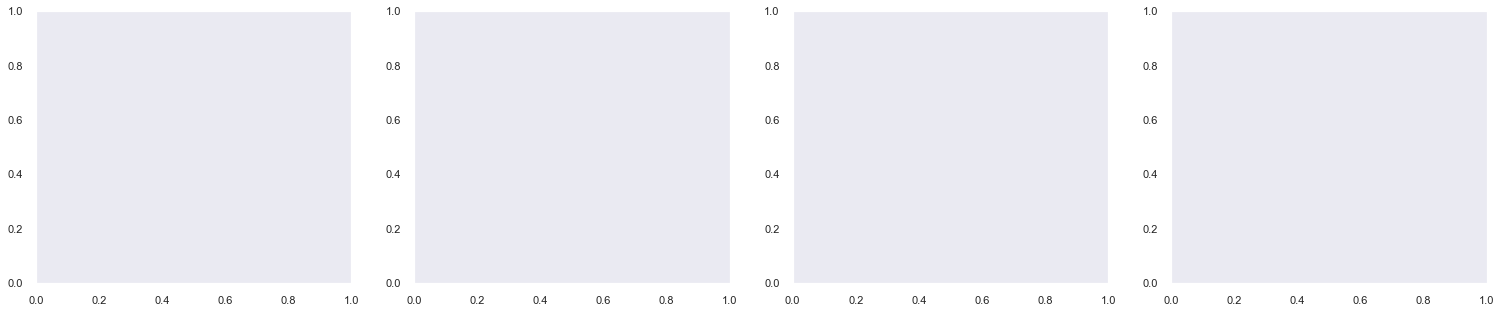

In [15]:
get_res(gmm_res=return_clustered_csv_gmm(
    data, 
    GMM, 
    tfidf=pca_tfidf, w2v=w2v, 
    options=dict(n_components=len(major_labels), random_state=666), 
    options_tfidf=dict(covariance_type='full', max_iter=500),
    options_w2v=dict(covariance_type='full', max_iter=500),
    save=True), data=data)